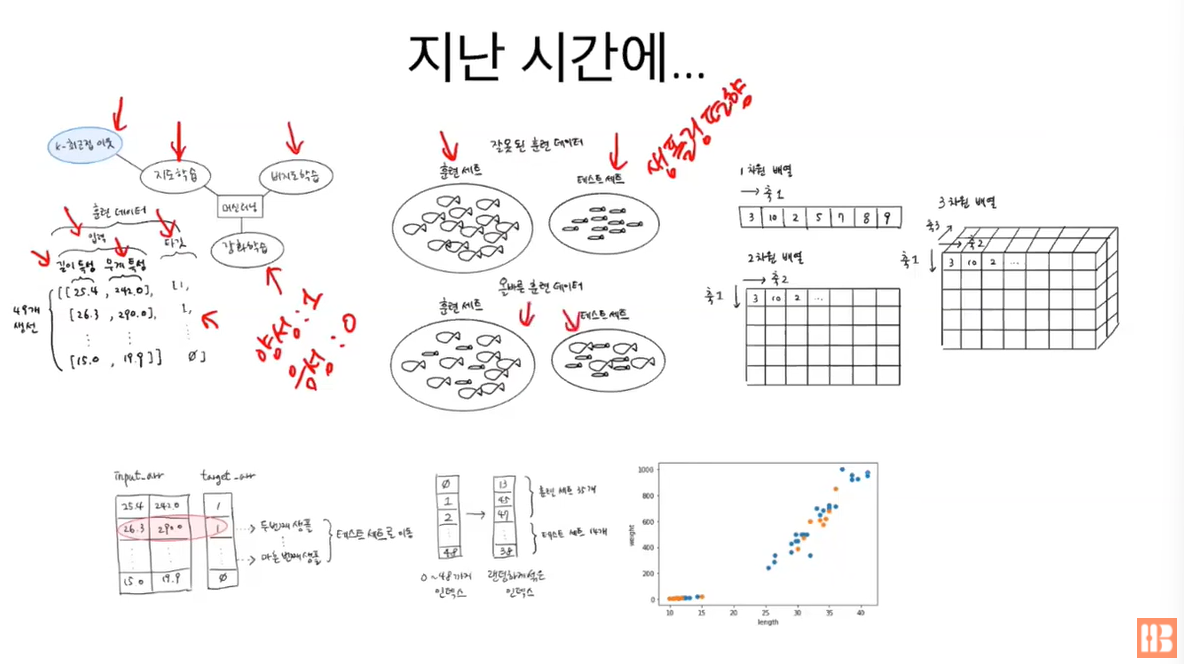

- 훈련 세트와 테스트 세트 둘다 골구로 나눠져 있어야 함

- input 과 target이 1대 1로 되어 있음
  - 랜덤하게 섞은 인덱스를 훈련/테스트 세트로 나눔
  - 메모리 차지하는게 거의 없음
- 빨간색 : 테스트, 파란색 : 훈련

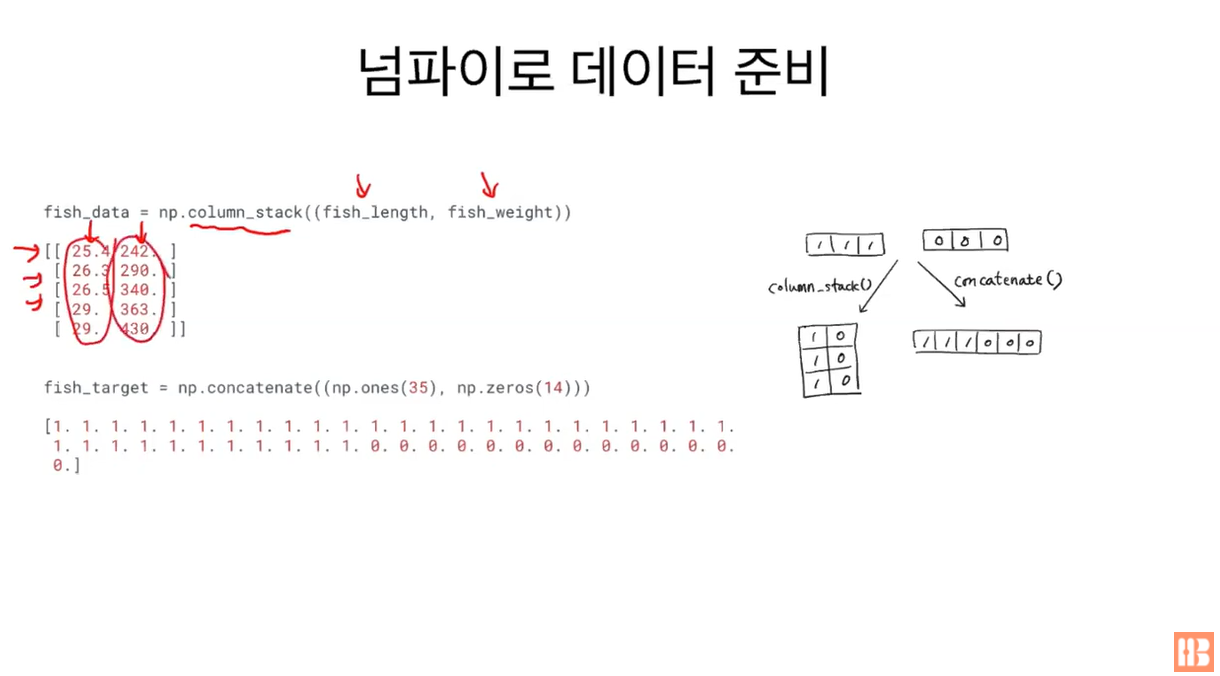

- np.column_stack으로 위와 같은 그림으로 데이터를 만들 수 있음
- np.concatenate로 위와 같이 연결하여 붙일 수 있음

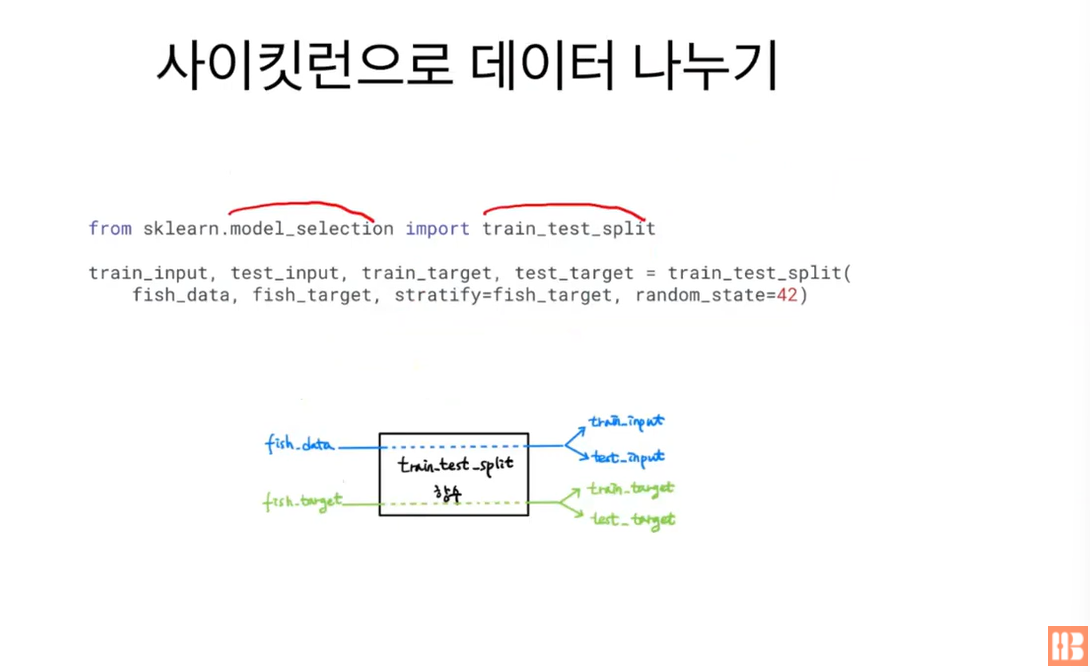

- stratify에 target을 넣으면 target을 보고 적절히 섞어줌
- random_state는 섞는 것인데 특별한 의미를 가지지는 않음

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_data = [[l,w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

In [2]:
import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

index = np.arange(49)
(np.random.shuffle(index)) # shuffle을 통하여 섞을 수 있음

train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

[0]


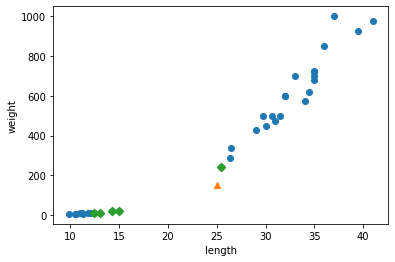

In [3]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

print(kn.predict([[25,150]]))
# 빙어라고 예측하고 있음

distances, indexes = kn.kneighbors([[25,150]]) # 가장 가까운 데이터를 통하여 결정함

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1],
            marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- x축 y축 스케일이 다르기 때문에 거리가 가까워 보이는 것도 멀게 느껴짐

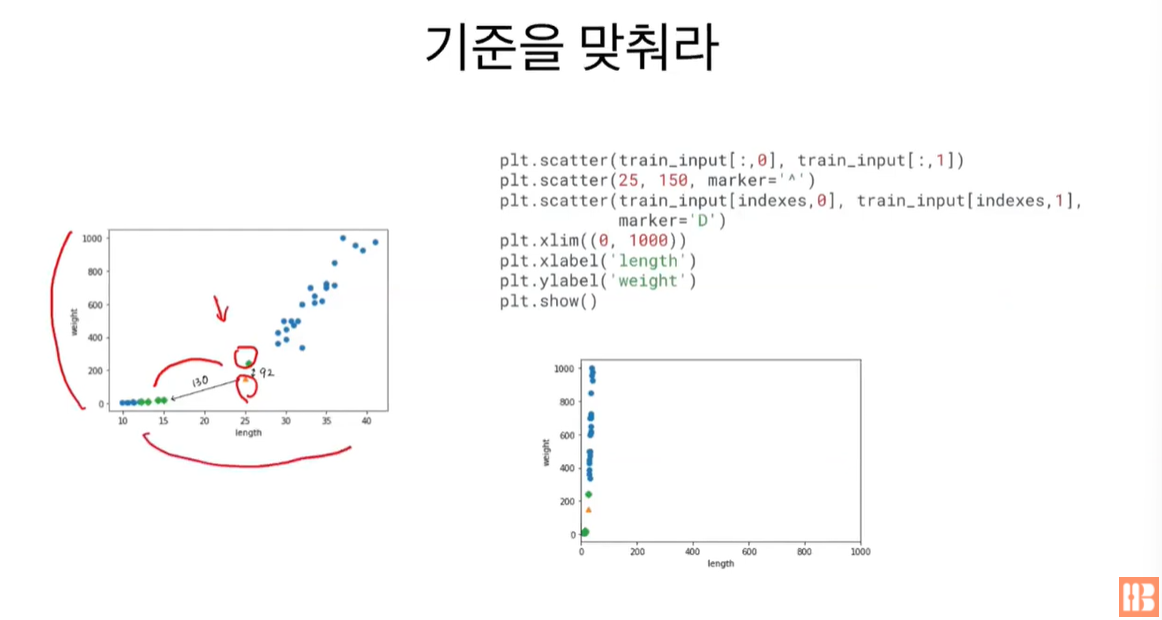

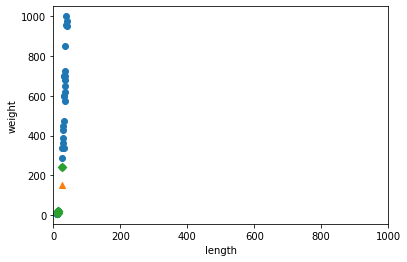

In [ ]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0, 1000))
plt.xlabel('length') # scale을 맞춤
plt.ylabel('weight')
plt.show()

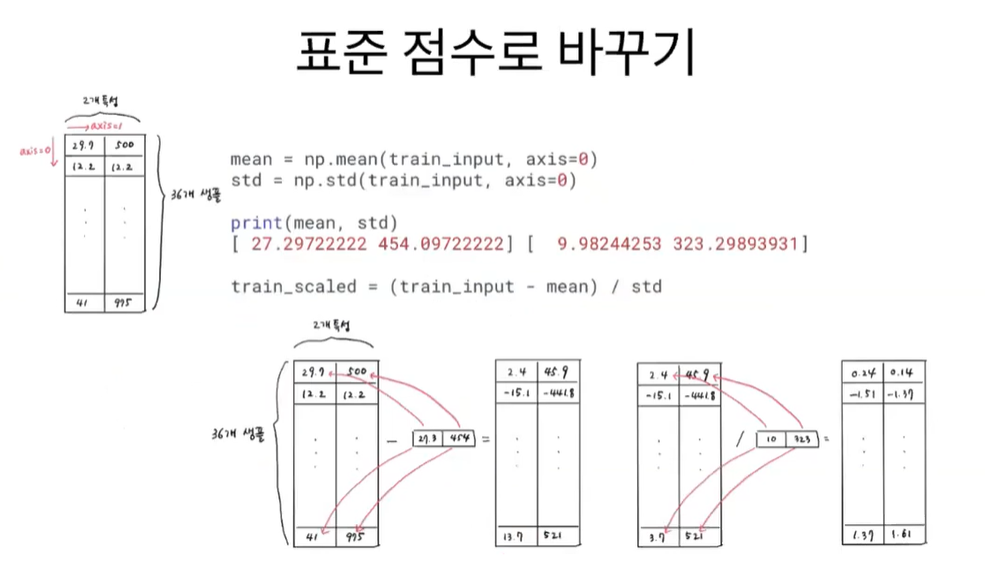

- 표준 점수 = (특성 - 평균 / 표준 편차)

In [ ]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

print(mean, std)

train_scaled = (train_input - mean) / std

[ 26.36       420.77142857] [ 10.27588578 332.9066103 ]


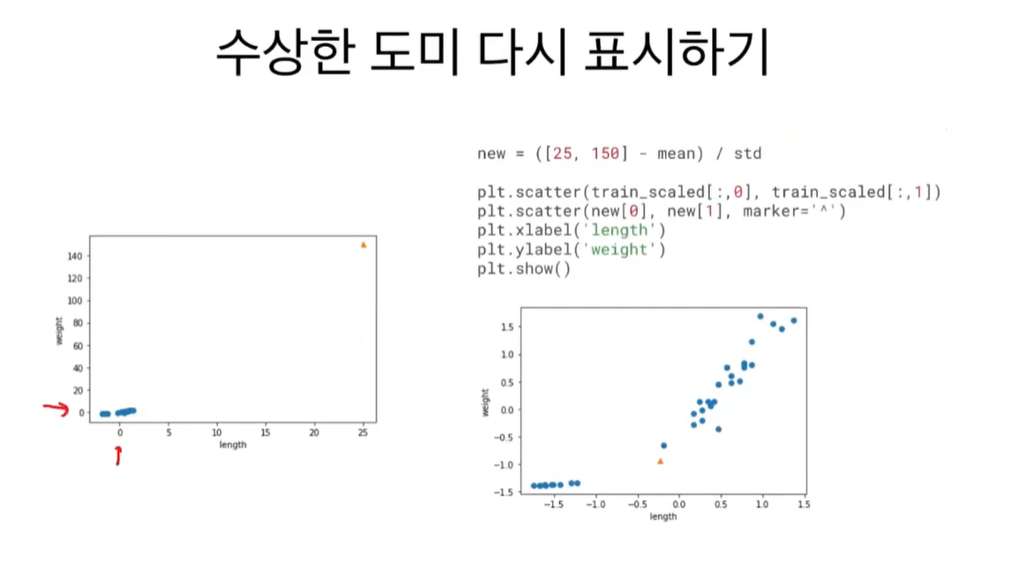

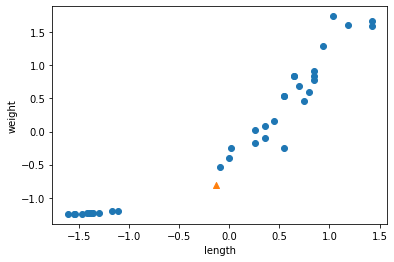

In [ ]:
new = ([25, 150] - mean) / std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 위치는 똑같이 위치하나 스케일이 달라짐

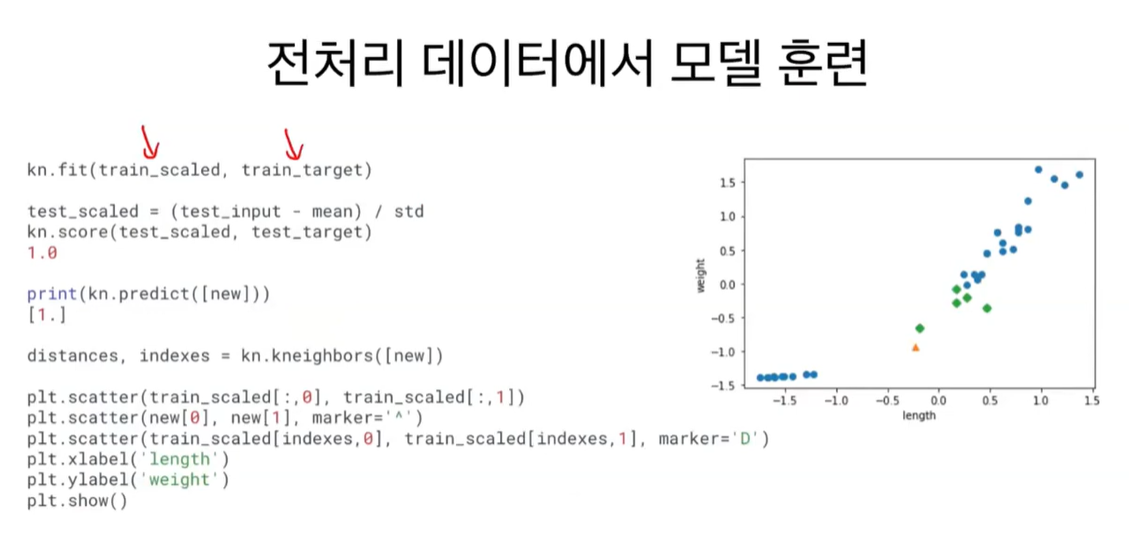

[1]


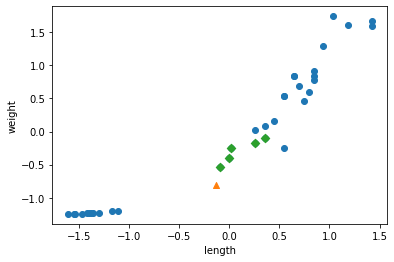

In [ ]:
kn.fit(train_scaled, train_target)
test_scaled = (test_input - mean) / std
kn.score(test_scaled, test_target)

print(kn.predict([new]))

distances, indexes = kn.kneighbors([new])

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D') # 스케일 된 범위에서 가장 가까운 5개의 데이터로 결과를 가져옴
plt.xlabel('length')
plt.ylabel('weight')
plt.show()